# Exploratory Data Analysis

Feature description

age | int64 | age in years

job | object | type of job (categorical: ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar' 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed' 'student'])

marital | object | marital status (categorical: ['married' 'single' 'divorced'])

education | Object | education background (categorical: ['secondary' 'tertiary' 'primary' 'unknown'])

default | Object | has credit in default? (categorical: ['no' 'yes'])

balance | int64 | Balance of the individual

housing | object | has housing loan? (categorical: ['yes' 'no'])

loan | object | has personal loan? (categorical: ['no' 'yes'])

contact | object | contact communication type (categorical: ['unknown' 'cellular' 'telephone'])

day | int64 | last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

month | object | last contact month of year (categorical: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'])

duration | int64 | last contact duration, in seconds (numeric)

campaign | int64 | number of contacts performed during this campaign and for this client

pdays | int64 | number of days that passed by after the client was last contacted from a previous campaign 

previous | int64 | number of contacts performed before this campaign and for this client

poutcome | object | outcome of the previous marketing campaign (categorical: ['unknown' 'other' 'failure' 'success'])

y - has the client subscribed a term deposit? (binary: 'yes','no')



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import data
file = 'bank-marketing.csv'

In [3]:
main_database = pd.read_csv(file)

In [4]:
main_database.head()

,age,age group,eligible,job,salary,marital,education,marital-education,targeted,default,...,contact,day,month,duration,campaign,pdays,previous,poutcome,y,response
0,58,5,Y,management,100000,married,tertiary,married-tertiary,yes,no,...,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,4,Y,technician,60000,single,secondary,single-secondary,yes,no,...,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,3,Y,entrepreneur,120000,married,secondary,married-secondary,yes,no,...,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,4,Y,blue-collar,20000,married,unknown,married-unknown,no,no,...,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,3,Y,unknown,0,single,unknown,single-unknown,no,no,...,unknown,5,may,198,1,-1,0,unknown,no,0


In [5]:
main_database.drop('marital-education', inplace=True, axis=1)

We deleted 'marital-education' feature as unwanted.

In [6]:
# find missing values
features_na = [features for features in main_database.columns if main_database[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(main_database[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")

No missing value found


There are no missing values.

In [7]:
# find unique value
for column in main_database.columns:
    print(column,main_database[column].nunique())

age 77
age group 9
eligible 2
job 12
salary 11
marital 3
education 4
targeted 2
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
y 2
response 2


All features have more than one value.

In [8]:
# find categorical features
categorical_features=[feature for feature in main_database.columns if ((main_database[feature].dtypes=='O'))]


In [9]:
categorical_features

['eligible',
 'job',
 'marital',
 'education',
 'targeted',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [10]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(main_database[feature].unique())))

The feature is eligible and number of categories are 2
The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is targeted and number of categories are 2
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 4
The feature is y and number of categories are 2


There are 12 categorical features.
Job, month have the highest number of categories.

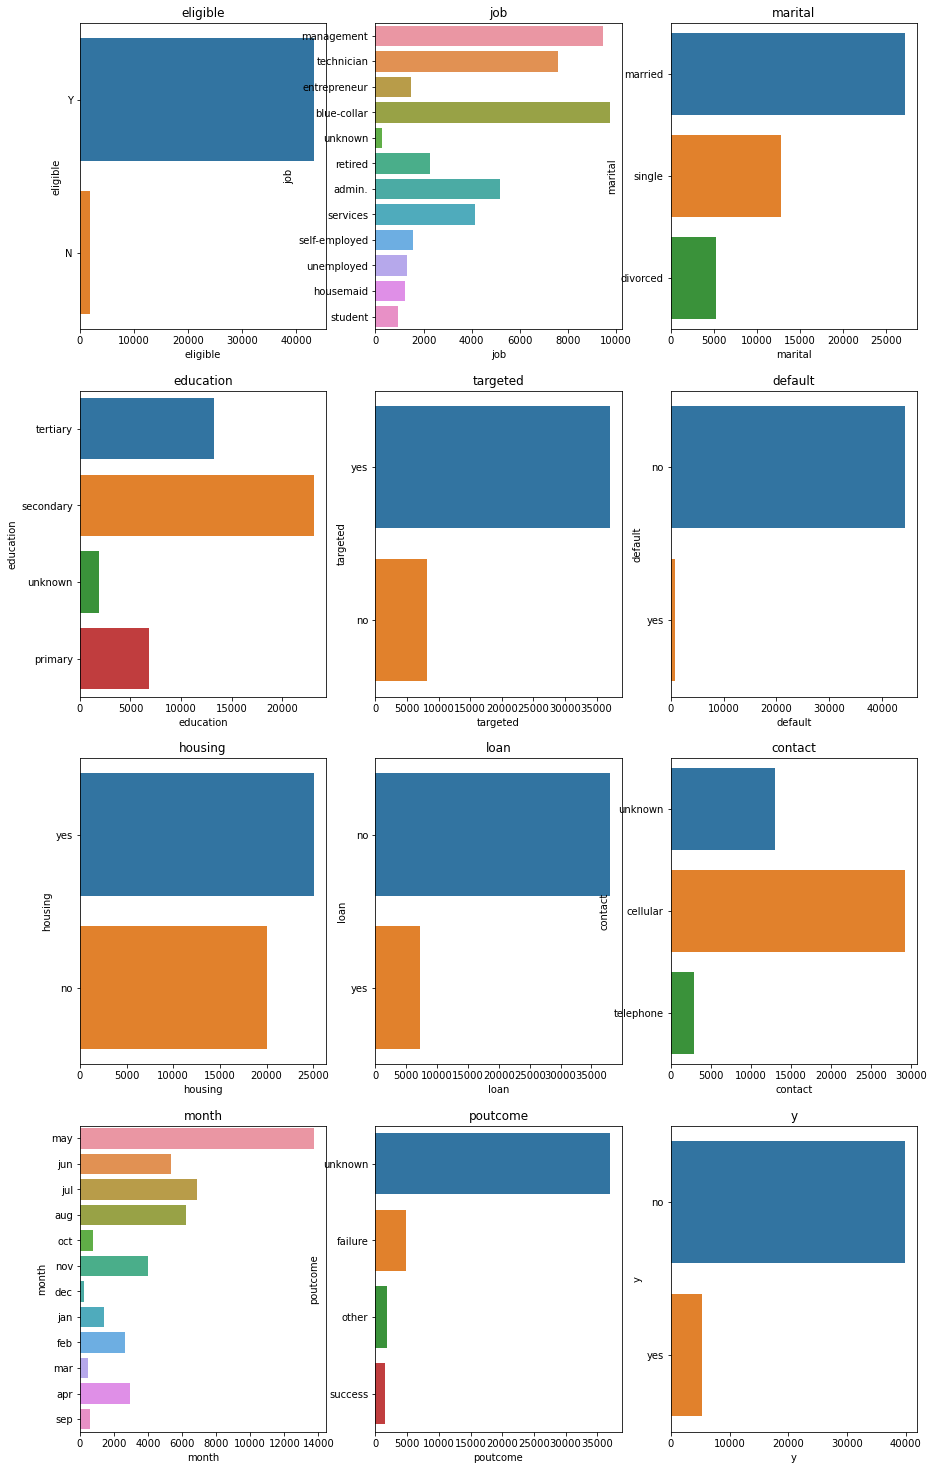

In [11]:
#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=main_database)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

Clients whose job is management or blue-collar are high and students are low. 

Married clients with secondary education are high. 

Clients last contacted in May are high.

###### Choosing column 'response' as potential target feature and further exploring relationship with other features:

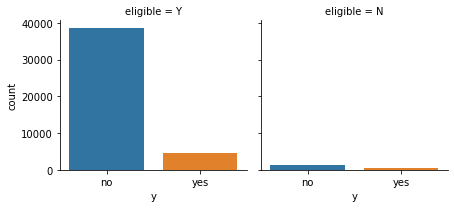

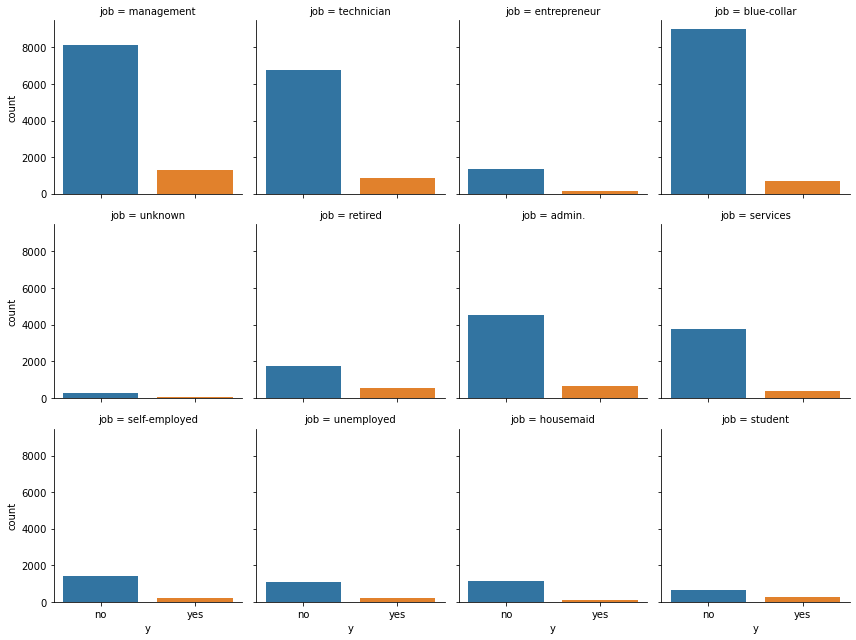

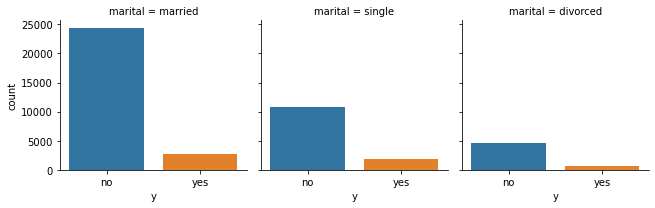

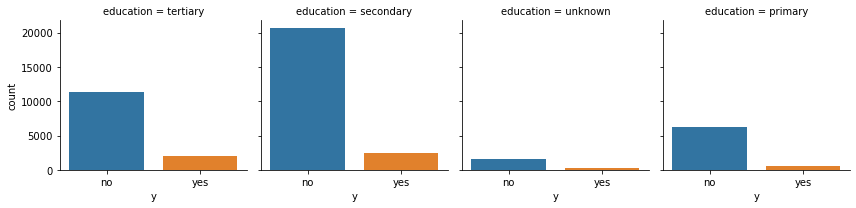

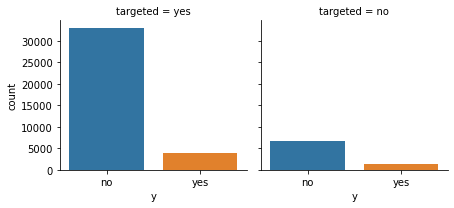

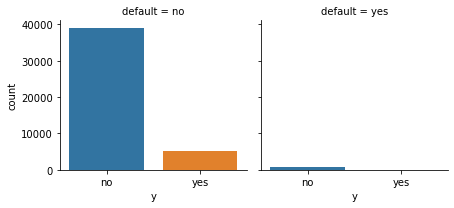

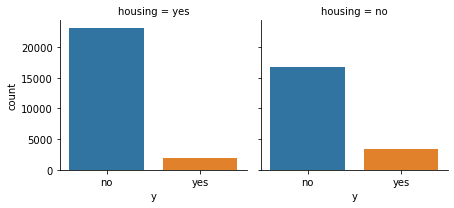

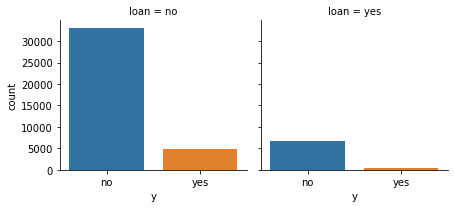

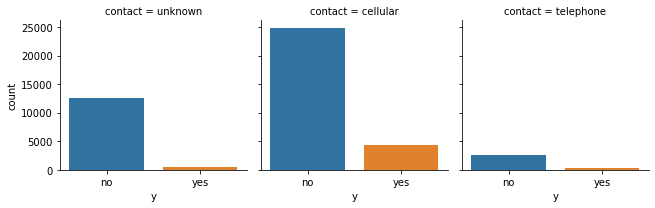

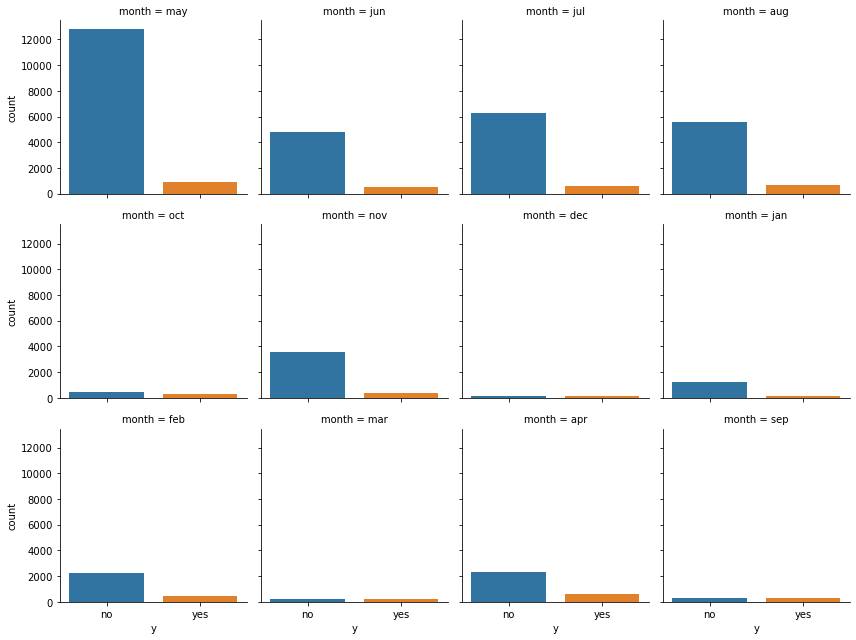

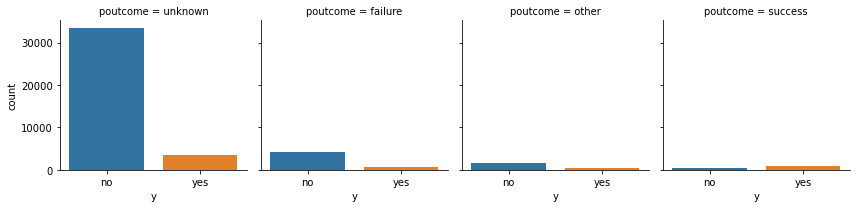

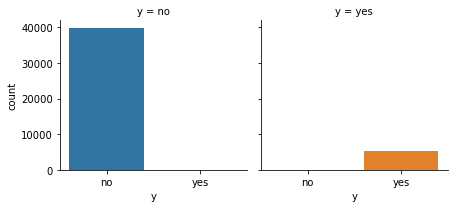

In [12]:
#check target label split over categorical features
#Find out the relationship between categorical variable and dependent variable
for categorical_feature in categorical_features:
    sns.catplot(x='y', col=categorical_feature, kind='count',col_wrap=4,height=3, aspect=1, data= main_database)
plt.show()

In [13]:
y = main_database['y']
y_yes = y[main_database['y'] == 'yes']
y_yes.count()

5289

In [14]:
print("There is: ", round(len(y_yes) / len(main_database['y']) * 100, 2), "% of positive answers overall.")


There is:  11.7 % of positive answers overall.


In [15]:
print("There is: ", round(len(y_yes) / len(main_database[main_database['loan'] == 'no']) * 100, 2), "% of positive answers where people don't have any loan.")

There is:  13.93 % of positive answers where people don't have any loan.


In [16]:
print("There is: ", round(len(y_yes) / len(main_database[main_database['eligible'] == 'Y']) * 100, 2),"% of positive answers where people are eligible.")

There is:  12.19 % of positive answers where people are eligible.


The above is also the feature with the highest number of positive answers out of all.

In [17]:
# list of numerical variables
numerical_features = [feature for feature in main_database.columns if ((main_database[feature].dtypes != 'O') & (feature not in ['y']))]
print('Number of numerical variables: ', len(numerical_features))

main_database[numerical_features].head()

Number of numerical variables:  10


,age,age group,salary,balance,day,duration,campaign,pdays,previous,response
0,58,5,100000,2143,5,261,1,-1,0,0
1,44,4,60000,29,5,151,1,-1,0,0
2,33,3,120000,2,5,76,1,-1,0,0
3,47,4,20000,1506,5,92,1,-1,0,0
4,33,3,0,1,5,198,1,-1,0,0


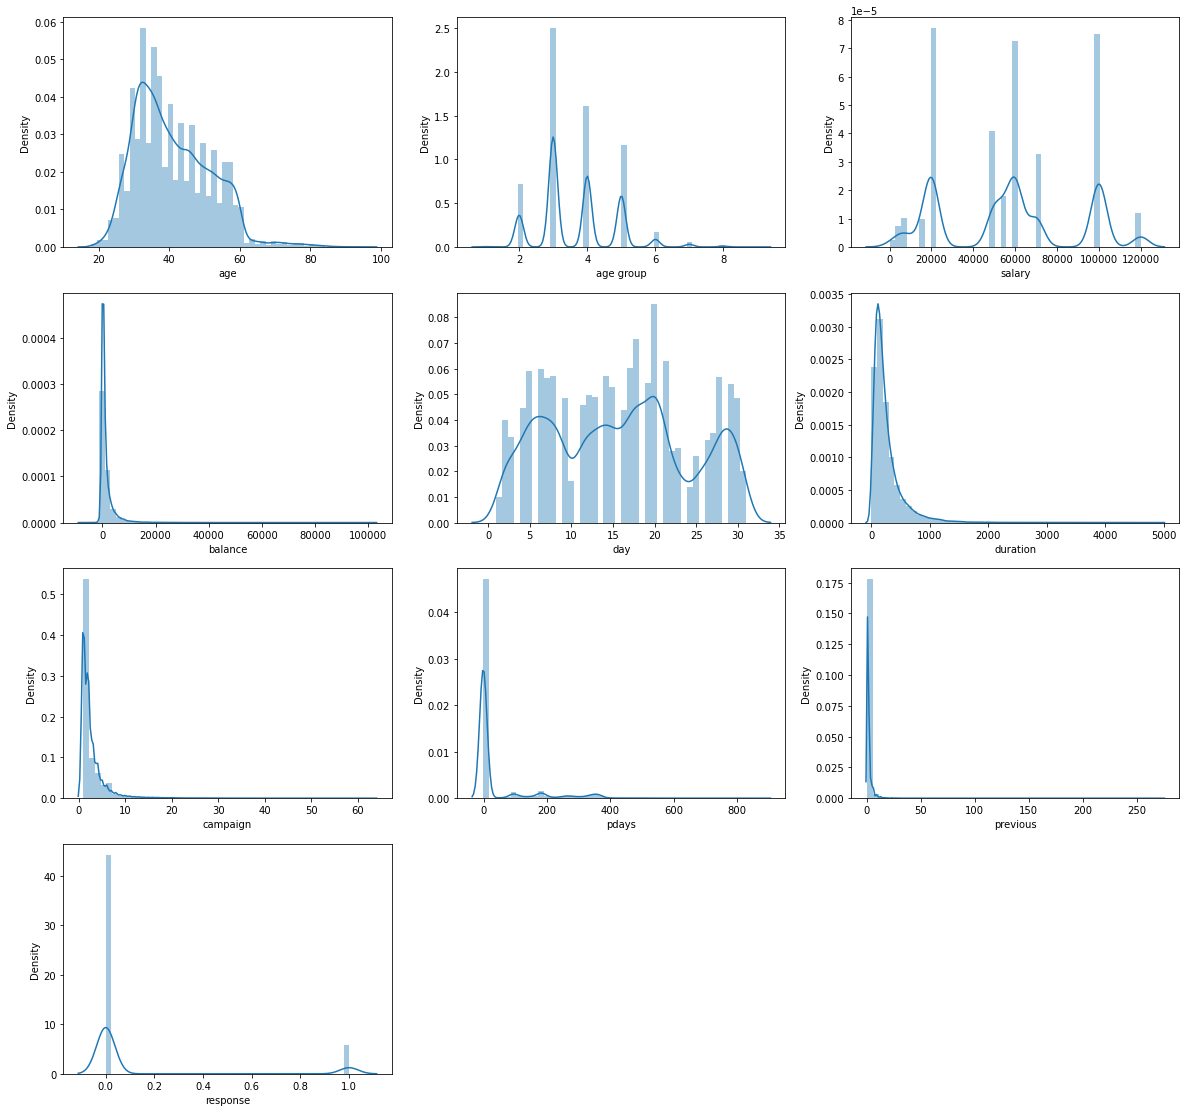

In [18]:
#plot a univariate distribution of numerical observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(main_database[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

Age, salary and day have normal distribution. Other features are exponential or have outliers.

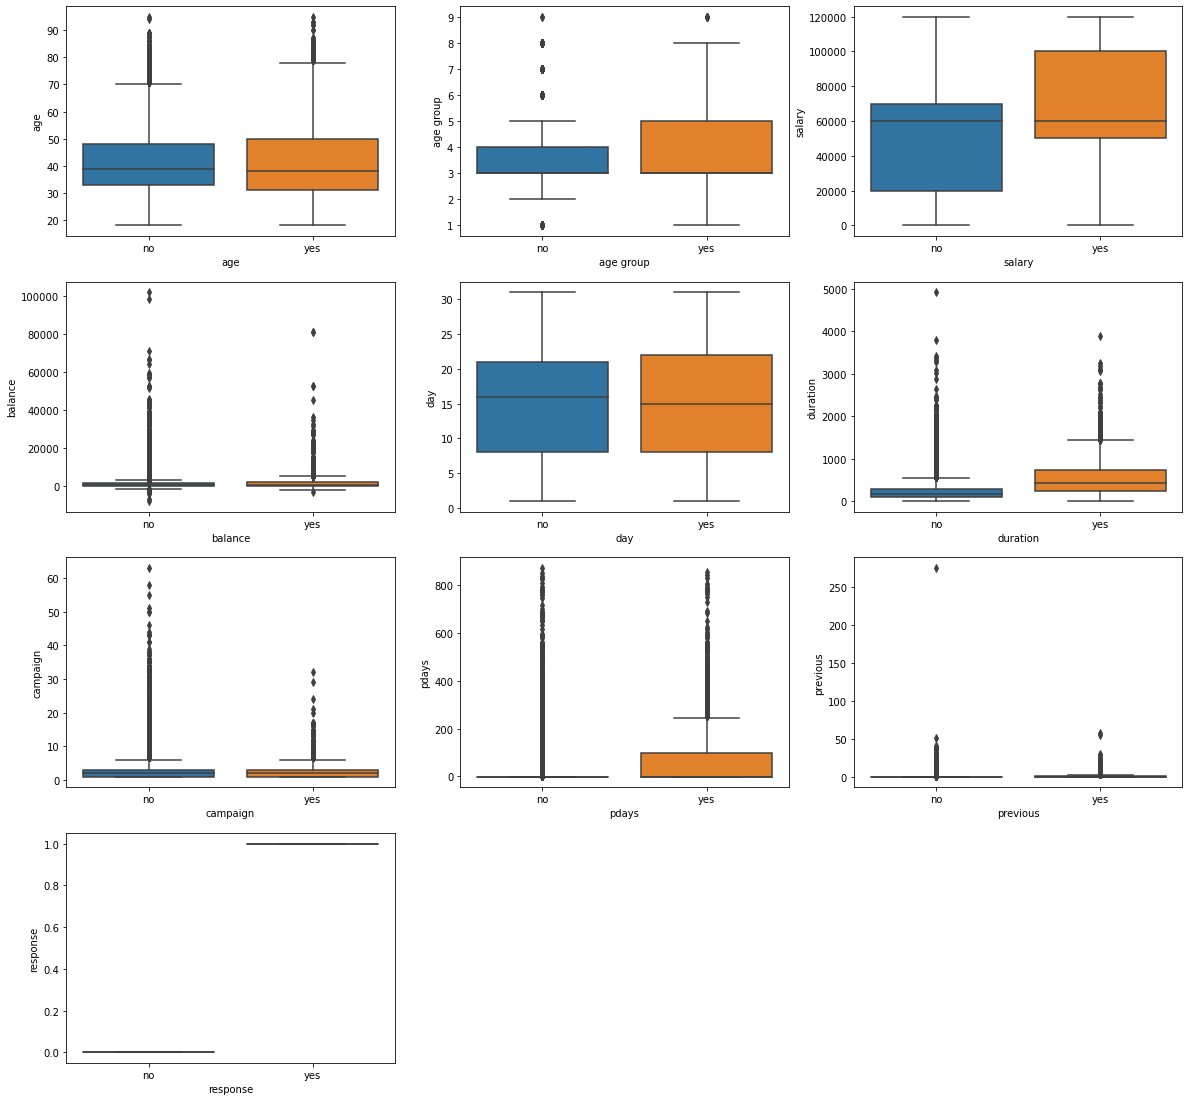

In [19]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y", y= main_database[feature], data=main_database)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

Higher values of Salary, age group, duration of the call, and the number of days since the call indicate positive response (yes).

###### Check if target feature data  is balanced:

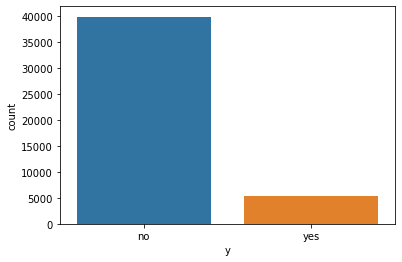

In [20]:
sns.countplot(x='y',data=main_database)
plt.show()

In [21]:
corr_matrix = main_database.corr().abs()

In [22]:
corr_matrix

,age,age group,salary,balance,day,duration,campaign,pdays,previous,response
age,1.000000,0.963942,0.024357,0.097783,0.009120,0.004648,0.004760,0.023758,0.001288,0.025155
age group,0.963942,1.000000,0.029469,0.095651,0.005646,0.006812,0.006227,0.021921,0.002780,0.023382
salary,0.024357,0.029469,1.000000,0.055469,0.027864,0.009937,0.015005,0.014968,0.014564,0.020012
balance,0.097783,0.095651,0.055469,1.000000,0.004503,0.021560,0.014578,0.003435,0.016674,0.052838
day,0.009120,0.005646,0.027864,0.004503,1.000000,0.030206,0.162490,0.093044,0.051710,0.028348
duration,0.004648,0.006812,0.009937,0.021560,0.030206,1.000000,0.084570,0.001565,0.001203,0.394521
campaign,0.004760,0.006227,0.015005,0.014578,0.162490,0.084570,1.000000,0.088628,0.032855,0.073172
pdays,0.023758,0.021921,0.014968,0.003435,0.093044,0.001565,0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.002780,0.014564,0.016674,0.051710,0.001203,0.032855,0.454820,1.000000,0.093236
response,0.025155,0.023382,0.020012,0.052838,0.028348,0.394521,0.073172,0.103621,0.093236,1.000000



There is a large disbalance in the data.

In [23]:
df=main_database
df

,age,age group,eligible,job,salary,marital,education,targeted,default,balance,...,contact,day,month,duration,campaign,pdays,previous,poutcome,y,response
0,58,5,Y,management,100000,married,tertiary,yes,no,2143,...,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,4,Y,technician,60000,single,secondary,yes,no,29,...,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,3,Y,entrepreneur,120000,married,secondary,yes,no,2,...,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,4,Y,blue-collar,20000,married,unknown,no,no,1506,...,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,3,Y,unknown,0,single,unknown,no,no,1,...,unknown,5,may,198,1,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,5,Y,technician,60000,married,tertiary,yes,no,825,...,cellular,17,nov,977,3,-1,0,unknown,yes,1
45207,71,7,N,retired,55000,divorced,primary,yes,no,1729,...,cellular,17,nov,456,2,-1,0,unknown,yes,1
45208,72,7,N,retired,55000,married,secondary,yes,no,5715,...,cellular,17,nov,1127,5,184,3,success,yes,1
45209,57,5,Y,blue-collar,20000,married,secondary,yes,no,668,...,telephone,17,nov,508,4,-1,0,unknown,no,0


In [24]:
df.to_csv(r'/Users/majapedigo/Desktop/Capstone-Project-I/Clean_df.csv', index=False)
